In [1]:
## data link - https://www.kaggle.com/c/ashrae-energy-prediction/data 
## Filename - Building Meta Data

### Plotting 

In [2]:
# multiple plots on single axis
import pandas as pd
building = pd.read_csv("building_metadata.csv")
building.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [3]:
## multiple plots on single axis 
import matplotlib.pyplot as plt

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


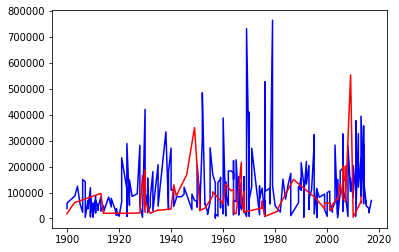

In [4]:
education_buildings = building[building.primary_use == 'Education']
education_buildings.sort_values('year_built', inplace=True)
plt.plot(education_buildings.year_built, education_buildings.square_feet, color='blue')

residential = building[building.primary_use == 'Lodging/residential']
residential.sort_values('year_built', inplace=True)
plt.plot(residential.year_built, residential.square_feet, color='red')

plt.show()

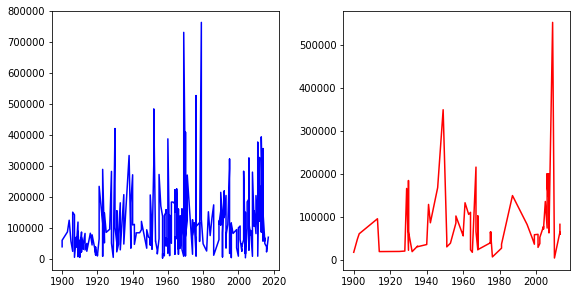

In [5]:
# plt.axes([xlo, ylo, width, height])
plt.axes([0.05, 0.05, 0.525, 0.9])
plt.plot(education_buildings.year_built, education_buildings.square_feet, color='blue')

plt.axes([0.725, 0.05, 0.525, 0.9])
plt.plot(residential.year_built, residential.square_feet, color='red')

plt.show()

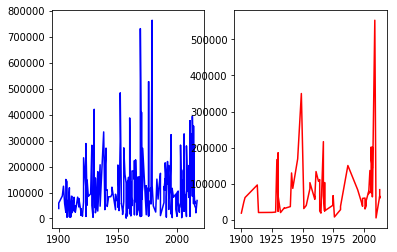

In [6]:
# plt.subplot(m, n, k) to make the subplot grid of dimensions m by n and to make the kth subplot active
plt.subplot(1,2,1)
plt.plot(education_buildings.year_built, education_buildings.square_feet, color='blue')

plt.subplot(1,2,2)
plt.plot(residential.year_built, residential.square_feet, color='red')

plt.show()

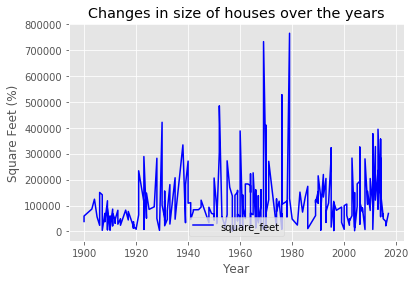

In [7]:
plt.style.use('ggplot')

plt.plot(education_buildings.year_built, education_buildings.square_feet, color='blue')

plt.legend(loc="lower center")

# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('Square Feet (%)')
plt.title('Changes in size of houses over the years')

plt.show()

#### Linear Regression using Seaborn

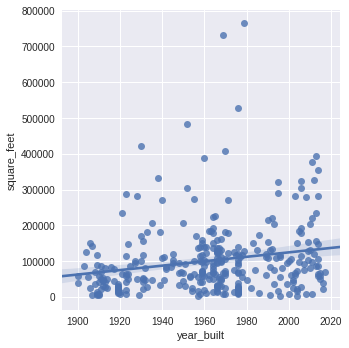

In [8]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a linear regression 
sns.lmplot(x='year_built', y='square_feet', data=education_buildings)

# Display the plot
plt.show()

#### Residual plot

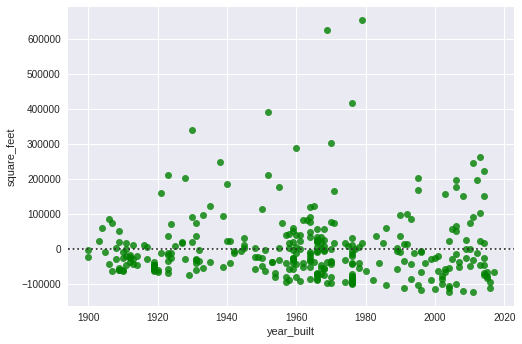

In [9]:
sns.residplot(x='year_built', y='square_feet', data=education_buildings, color='green')

# Display the plot
plt.show()

#### Higher order residuals

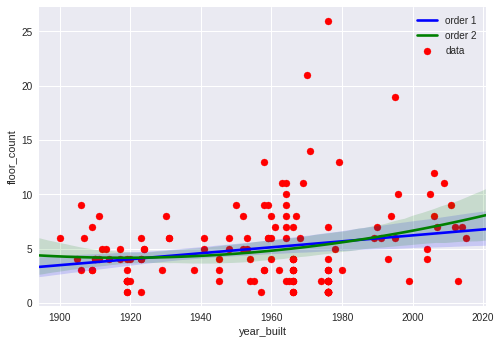

In [11]:
# Generate a scatter plot 
plt.scatter(education_buildings['year_built'], education_buildings['floor_count'], label='data', color='red', marker='o')

# Plot in blue a linear regression of order 1 
sns.regplot(x='year_built', y='floor_count', data=education_buildings, scatter=None, color='blue', label='order 1')

# Plot in green a linear regression of order 2 
sns.regplot(x='year_built', y='floor_count', data=education_buildings, scatter=None, order=2, color='green', label='order 2')

# Add a legend and display the plot
plt.legend(loc='upper right')
plt.show()

#### Plot with hue

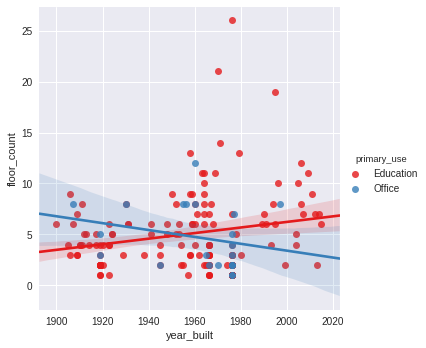

In [21]:
# Plot a linear regression with hue 
sns.lmplot(x='year_built', y='floor_count', data=building[building['primary_use'].isin(['Education','Office'])], hue='primary_use', palette='Set1')

# Display the plot
plt.show()


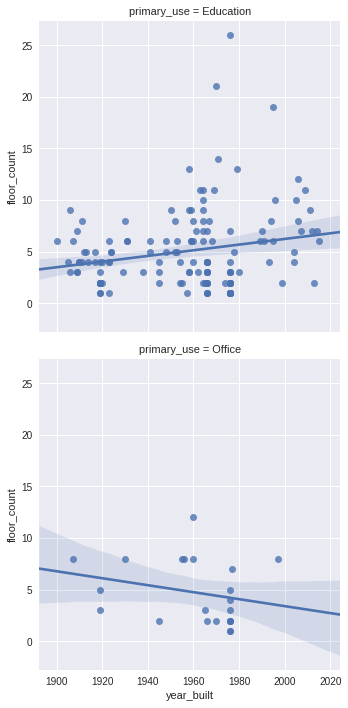

In [22]:
# Plot linear regressions grouped row-wise by 'primary use'
sns.lmplot(x='year_built', y='floor_count', data=building[building['primary_use'].isin(['Education','Office'])], row='primary_use')

# Display the plot
plt.show()

#### Constructing different plots (Univariate analysis)

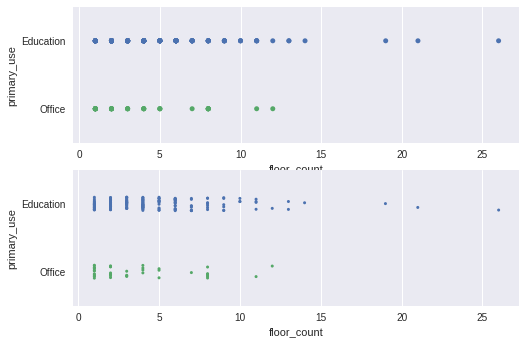

In [55]:
# Make a strip plot 
plt.subplot(2,1,1)
p = sns.stripplot(x='floor_count', y='primary_use', data=building[building['primary_use'].isin(['Education','Office'])])

# Make the strip plot again using jitter and a smaller point size
plt.subplot(2,1,2)
sns.stripplot(x='floor_count', y='primary_use', data=building[building['primary_use'].isin(['Education','Office'])], size=3, jitter=True)
# Jitter is useful when many points overlap

# Display the plot
plt.show()

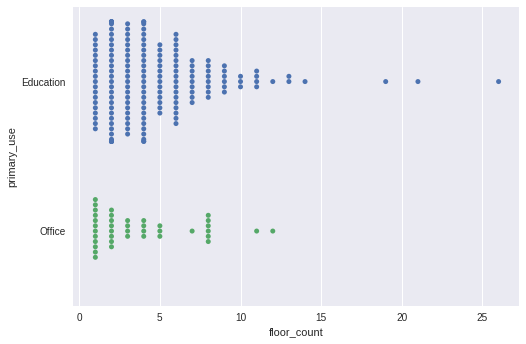

In [52]:
# Make a swarm plot 
sns.swarmplot(x='floor_count', y='primary_use', data=building[building['primary_use'].isin(['Education','Office'])])

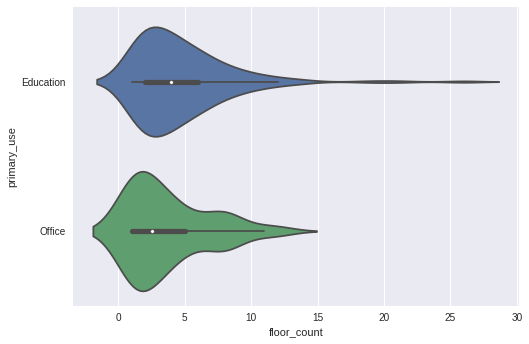

In [51]:
sns.violinplot(x='floor_count', y='primary_use', data=building[building['primary_use'].isin(['Education','Office'])])

#### Multivariate analysis

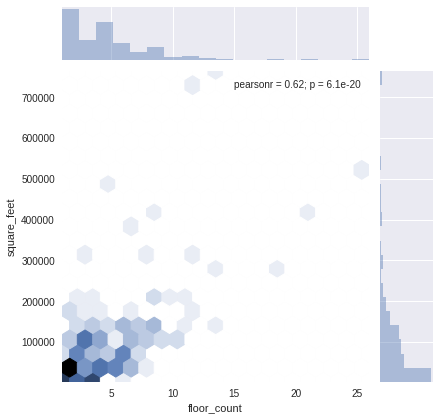

In [57]:
# Generate a joint plot of 'hp' and 'mpg'
sns.jointplot('floor_count', 'square_feet', education_buildings, kind='hex')